In [1075]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm
from pprint import pprint

In [1076]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer'

In [1077]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))


In [1078]:
StatisticsColumns = [
    'ReachedKnowledgeStep', 'AlmostReachedKnowledgeStep',
    'Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [1079]:
replacements = {
    'met': 'method',
    'pla': 'player',
    'eff': 'simpleEffect',
    'obj': 'objective',
    'sim': 'simulation',
    'rat': 'almostRatio',
    'pdep': 'playerDepth',
}

def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        if data[i] in replacements.keys():
            data[i] = replacements[data[i]]

        result[data[i]] = data[i+1]

    return result

In [1080]:
dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df['objective'] = original_df['objective'].replace(np.nan, '-')
original_df['playerDepth'] = original_df['playerDepth'].replace(np.nan, '1')
original_df.loc[original_df['method'] == 'random', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'random', 'simulation'] = '-'

100%|██████████| 48/48 [00:07<00:00,  6.83it/s]


In [1081]:
original_df.head()

,EpisodeCount,StepCount,Time,InstanceUUID,SettleCount,ChangedCount,MeanComparisonCount,StdComparisonCount,ReachedKnowledgeStep,AlmostReachedKnowledgeStep,...,Target_BombPiece,Target_RainbowPiece,method,player,simpleEffect,objective,simulation,almostRatio,playerDepth,Sum_Matched
0,1,300,2023-05-16 12:47:26.044,06c6c84a,0,209,0.826667,0.661878,277,174,...,2,3,mcts,0,1,knowledge,100,0.75,1,534
1,2,301,2023-05-16 12:48:40.894,06c6c84a,0,224,0.933555,0.679880,56,56,...,2,3,mcts,0,1,knowledge,100,0.75,1,414
2,3,300,2023-05-16 12:49:57.647,06c6c84a,0,230,0.900000,0.609293,109,93,...,2,3,mcts,0,1,knowledge,100,0.75,1,480
3,4,300,2023-05-16 12:51:09.409,06c6c84a,0,196,0.763333,0.654791,175,70,...,2,3,mcts,0,1,knowledge,100,0.75,1,456
4,5,300,2023-05-16 12:52:26.411,06c6c84a,0,203,0.863333,0.730136,63,63,...,2,3,mcts,0,1,knowledge,100,0.75,1,432


In [1082]:
original_df.columns.values.tolist()

['EpisodeCount',
 'StepCount',
 'Time',
 'InstanceUUID',
 'SettleCount',
 'ChangedCount',
 'MeanComparisonCount',
 'StdComparisonCount',
 'ReachedKnowledgeStep',
 'AlmostReachedKnowledgeStep',
 'Matched_HorizontalPiece',
 'Matched_VerticalPiece',
 'Matched_CrossPiece',
 'Matched_RocketPiece',
 'Matched_BombPiece',
 'Matched_RainbowPiece',
 'Target_HorizontalPiece',
 'Target_VerticalPiece',
 'Target_CrossPiece',
 'Target_RocketPiece',
 'Target_BombPiece',
 'Target_RainbowPiece',
 'method',
 'player',
 'simpleEffect',
 'objective',
 'simulation',
 'almostRatio',
 'playerDepth',
 'Sum_Matched']

In [1083]:
match_result = original_df.groupby(['method', 'objective', 'playerDepth', 'simulation'])[
                                      'method',
                                       'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      'AlmostReachedKnowledgeStep', 'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        'AlmostReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


method AlmostReachedKnowledgeStep  \
                                         count                       mean   
method objective playerDepth simulation                                     
mcts   knowledge 1           100          4784                 104.394440   
                             200          4686                 101.526035   
                             400          4327                 100.355674   
                 2           100          3401                  90.433696   
                             200          3034                  88.050758   
                             400          2807                  86.553260   
       score     1           100          2383                  89.608477   
                             200          2256                  89.613032   
                             400          2090                  86.599043   
                 2           100          1720                  89.112791   
                             200          1518                  91.219368   
                             400          1390                  86.451799   
random -         -           -            2019                 115.677068   

                                        ReachedKnowledgeStep  \
                                                        mean   
method objective playerDepth simulation                        
mcts   knowledge 1           100                  117.694816   
                             200                  114.380922   
                             400                  113.757569   
                 2           100                  115.634813   
                             200                  114.407053   
                             400                  114.354827   
       score     1           100                  117.786404   
                             200                  117.561170   
                             400                  115.400000   
                 2           100                  117.518023   
                             200                  115.604743   
                             400                  111.718705   
random -         -           -                    129.980188   

                                        Matched_HorizontalPiece  \
                                                           mean   
method objective playerDepth simulation                           
mcts   knowledge 1           100                      74.891304   
                             200                      77.561246   
                             400                      79.353131   
                 2           100                      74.898853   
                             200                      77.341793   
                             400                      78.842537   
       score     1           100                      75.020982   
                             200                      77.714539   
                             400                      79.280383   
                 2           100                      74.898256   
                             200                      77.488801   
                             400                      78.487770   
random -         -           -                        45.854879   

                                        Matched_VerticalPiece  \
                                                         mean   
method objective playerDepth simulation                         
mcts   knowledge 1           100                    55.696697   
                             200                    57.250534   
                             400                    58.642246   
                 2           100                    54.528080   
                             200                    56.384641   
                             400                    57.376559   
       score     1           100                    55.714226   
                             200                    57.7916

In [1084]:
def get_legend_name(x):
    if x['method'] == 'mcts':
        if x['objective'] == 'score':
            return f"{x['method']}_{x['objective']}_{x['simulation']}_{x['playerDepth']}"
        elif x['objective'] == 'knowledge':
            return f"{x['method']}_{x['objective']}_{x['almostRatio']}_{x['simulation']}_{x['playerDepth']}"
    else:
        return f"{x['method']}"

{'mcts_knowledge_0.75_100_1',
 'mcts_knowledge_0.75_100_2',
 'mcts_knowledge_0.75_200_1',
 'mcts_knowledge_0.75_200_2',
 'mcts_knowledge_0.75_400_1',
 'mcts_knowledge_0.75_400_2',
 'mcts_knowledge_1.0_100_1',
 'mcts_knowledge_1.0_100_2',
 'mcts_knowledge_1.0_200_1',
 'mcts_knowledge_1.0_200_2',
 'mcts_knowledge_1.0_400_1',
 'mcts_knowledge_1.0_400_2',
 'mcts_score_100_1',
 'mcts_score_100_2',
 'mcts_score_200_1',
 'mcts_score_200_2',
 'mcts_score_400_1',
 'mcts_score_400_2',
 'random'}


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'r_step'),
  Text(1, 0, 'ar_step'),
  Text(2, 0, 'b0'),
  Text(3, 0, 'b1'),
  Text(4, 0, 'b2'),
  Text(5, 0, 'b3'),
  Text(6, 0, 'b4'),
  Text(7, 0, 'b5')])

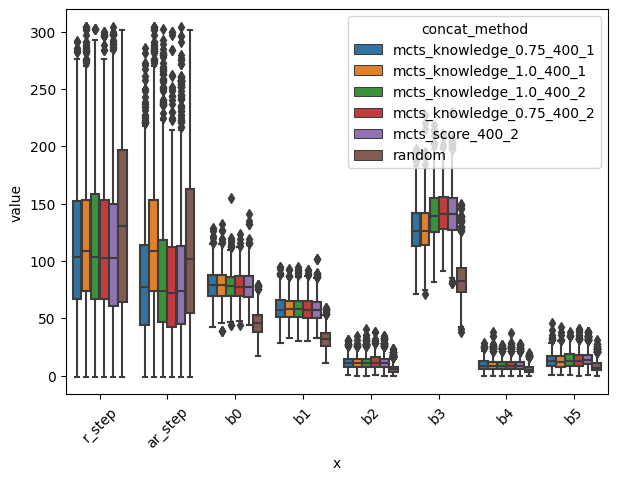

In [1085]:
melted_df = original_df.copy()

melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=2000, random_state=1, replace=True)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
pprint(set(melted_df['concat_method']))
# Display Target
melted_df = melted_df[melted_df['concat_method'].isin(['random',
                                                       'mcts_knowledge_1.0_400_1',
                                                       'mcts_knowledge_0.75_400_1',
                                                       'mcts_knowledge_1.0_400_2',
                                                       'mcts_knowledge_0.75_400_2',
                                                       'mcts_score_400_2'])]

plt.figure(figsize=(7, 5))
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation'],
                    value_vars=[*StatisticsColumns], ignore_index=False)

melted_df['x'] = melted_df['variable']
melted_df['x'] = melted_df['x'].str.replace('AlmostReachedKnowledgeStep', 'ar_step')
melted_df['x'] = melted_df['x'].str.replace('ReachedKnowledgeStep', 'r_step')

melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')

ax = sns.boxplot(x="x", y="value", hue="concat_method", data=melted_df)
plt.xticks(rotation=45)